## Assignment 2 Data Analysis using Pandas

This assignment will contain 2 question with details as below. The due date is October 23 (Sunday), 2022 23:59PM. Each late day will result in 20% loss of total points.

### Question 1 (20 points) Datacamp courses

Datacamp is the online learning platform for data science courses and modules. As the only collaborator in Portugal, this course provides free access to the students in Business Analytics as the complementary resource. For this assignment, you are expected to complete the following moduels and submit your completion badges:

- [Importing & Cleaning Data with Python](https://app.datacamp.com/learn/skill-tracks/importing-cleaning-data-with-python)
- [Data Manipulation with Python](https://app.datacamp.com/learn/skill-tracks/data-manipulation-with-python)

Each badge will account for 10 points. If you are confident with the knowledge, you may skip the videos and directly finish the challenges. You can submit the badge by the end of the October if you would need more time. 

In [82]:
#I will send the badges via mail

### Question 2 (80 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/4/4f/Wonder_Woman_1984_poster.png) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 2.1** (25 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Stars (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2.6M)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Gross box Office Revenue (\$28,884,504)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 

Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from lxml import html

# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

#storing movie information in lists
movie_url = [link.attrs.get('href') for link in soup.select('td.titleColumn a')]
movie_url2 = ['https://www.imdb.com' + link for link in movie_url]

In [27]:
#movie_url3 = movie_url2[:2] <- test set

IMDb_id = []
name = []
year = []
director = []
stars = []
rating = []
number_reviews = []
genres = []
country = []
language = []
budget = []
revenue = []
runtime = []
rank = []


i = 1
for link in movie_url2:
    url = link
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    #id
    IMDb_id.append(link[-8:-1])
    #name
    movie_string = soup.find('title').get_text()
    name.append(movie_string[:-14])
    #year
    year.append(movie_string[-12:-8])
    #director
    director.append(soup.find("a", {"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).get_text())
    #stars
    stars_list = []
    stars_str = ''
    a = soup.find_all("a", {"data-testid":"title-cast-item__actor"})[0:3]
    for actor in a:
        stars_list.append(actor.get_text())
        stars_str = joined_string = ','.join(stars_list)
    stars.append(stars_str)
    #rating
    rating.append(soup.find("span", {"class":"sc-7ab21ed2-1 jGRxWM"}).get_text())
    #number of reviews
    number_reviews.append(soup.find("div", {"class":"sc-7ab21ed2-3 dPVcnq"}).get_text())
    #genres
    genres_list = []
    genres_str = ''
    b = soup.find_all("a", {"class":"sc-16ede01-3 bYNgQ ipc-chip ipc-chip--on-baseAlt"})
    for genre in b:
        genres_list.append(genre.get_text())
        genres_str = joined_string = ','.join(genres_list)
    genres.append(genres_str)
    #country
    country.append(soup.find("li", {"data-testid":"title-details-origin"}).find("a").get_text())
    #language
    language.append(soup.find("li", {"data-testid":"title-details-languages"}).find("a").get_text())
    #budget
    try:
        budget_string = soup.find("li", {"data-testid":"title-boxoffice-budget"}).find("span", {"class":"ipc-metadata-list-item__list-content-item"}).get_text()
        budget.append(budget_string[:-12])
    except:
        budget.append(1)
    #revenue
    try:
        revenue.append(soup.find("li", {"data-testid":"title-boxoffice-cumulativeworldwidegross"}).find("span", {"class":"ipc-metadata-list-item__list-content-item"}).get_text())
    except:
        revenue.append(1)
    #runtime
    runtime.append(soup.find("li", {"data-testid":"title-techspec_runtime"}).find('div').get_text())
    #rank
    rank.append(i)
    i=i+1   
    
df = pd.DataFrame()
df['IMDb_id'] = IMDb_id
df['name'] = name
df['year'] = year
df['director'] = director
df['stars'] = stars
df['rating'] = rating
df['number_reviews'] = number_reviews
df['genres'] = genres
df['country'] = country
df['language'] = language
df['budget'] = budget
df['revenue'] = revenue
df['runtime'] = runtime
df['rank'] = rank

df.to_csv('IMDb3.csv', index=False)

In [28]:
import pandas as pd
dataDF = pd.read_csv('/Users/adi/Desktop/IMDb3.csv', dtype={'IMDb_id': 'string'})
pd.set_option("display.max_rows", None, "display.max_columns", None)

#cleaning data
dataDF['stars'] = dataDF['stars'].str.split(',')
dataDF['genres'] = dataDF['genres'].str.split(',')
dataDF

,IMDb_id,name,year,director,stars,rating,number_reviews,genres,country,language,budget,revenue,runtime,rank
0,0111161,Os Condenados de Shawshank,1994,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton]",9.3,2.7M,[Drama],United States,English,"$25,000,000","$28,884,504",2 hours 22 minutes,1
1,0068646,O Padrinho,1972,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan]",9.2,1.8M,"[Crime, Drama]",United States,English,"$6,000,000","$250,341,816",2 hours 55 minutes,2
2,0468569,O Cavaleiro das Trevas,2008,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart]",9.0,2.6M,"[Action, Crime, Drama]",United States,English,"$185,000,000","$1,006,234,167",2 hours 32 minutes,3
3,0071562,O Padrinho: Parte II,1974,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall]",9.0,1.3M,"[Crime, Drama]",United States,English,"$13,000,000","$47,961,919",3 hours 22 minutes,4
4,0050083,Doze Homens em Fúria,1957,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam]",9.0,783K,"[Crime, Drama]",United States,English,"$350,000",$955,1 hour 36 minutes,5
5,0108052,A Lista de Schindler,1993,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley]",9.0,1.3M,"[Biography, Drama, History]",United States,English,"$22,000,000","$322,161,245",3 hours 15 minutes,6
6,0167260,O Senhor dos Anéis - O Regresso do Rei,2003,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen]",9.0,1.8M,"[Action, Adventure, Drama]",New Zealand,English,"$94,000,000","$1,146,436,214",3 hours 21 minutes,7
7,0110912,Pulp Fiction,1994,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson]",8.9,2M,"[Crime, Drama]",United States,English,"$8,000,000","$213,928,762",2 hours 34 minutes,8
8,0120737,O Senhor dos Anéis - A Irmandade do Anel,2001,Peter Jackson,"[Elijah Wood, Ian McKellen, Orlando Bloom]",8.8,1.9M,"[Action, Adventure, Drama]",New Zealand,English,"$93,000,000","$898,182,036",2 hours 58 minutes,9
9,0060196,"O Bom, o Mau e o Vilão",1966,Sergio Leone,"[Clint Eastwood, Eli Wallach, Lee Van Cleef]",8.8,756K,"[Adventure, Western]",Italy,Italian,"$1,200,000","$25,253,887",2 hours 41 minutes,10


**Question 2.2** (5 points) If you group the movies by release years, show the number of movies at each decade in descending order.

In [67]:
decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
dataDF['decade'] = pd.cut(dataDF['year'], decades)
dataDF2 = dataDF[['name', 'decade']].groupby('decade').count()
dataDF2.columns = ['count_movies']
dataDF2.sort_values('count_movies', ascending=False) 

,count_movies
decade,
"(2000, 2010]",48
"(1990, 2000]",45
"(2010, 2020]",40
"(1980, 1990]",24
"(1970, 1980]",23
"(1950, 1960]",22
"(1960, 1970]",16
"(1940, 1950]",12
"(1930, 1940]",10


**Quesion 2.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [68]:
dataDF['runtime_new'] = pd.to_timedelta(dataDF['runtime'])
dataDF['runtime_min'] = dataDF.runtime_new.astype('timedelta64[m]')

dataDF.runtime_min.quantile([0.25,0.5,0.75,1])

0.25    108.0
0.50    126.5
0.75    145.0
1.00    238.0
Name: runtime_min, dtype: float64

In [69]:
dataDF['runtime_new'] = pd.to_timedelta(dataDF['runtime'])
dataDF['runtime_min'] = dataDF.runtime_new.astype('timedelta64[m]')
quartile = [0,0.25,0.5,0.75,1]
dataDF['quartile_runtime'] = pd.qcut(dataDF['runtime_min'], quartile)
DF3 = dataDF[['quartile_runtime', 'name']].groupby('quartile_runtime').count()
DF3.columns = ['count_movies']
DF3

,count_movies
quartile_runtime,
"(44.999, 108.0]",64
"(108.0, 126.5]",61
"(126.5, 145.0]",63
"(145.0, 238.0]",62


**Question 2.4** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [70]:
dataDF4 = dataDF[['name', 'stars']]
dataDF4 = dataDF4.explode('stars')
dataDF4 = dataDF4[['name', 'stars']].groupby('stars').count()
dataDF4.columns = ['count']
dataDF4.nlargest(10, 'count')

,count
stars,
Robert De Niro,9
Harrison Ford,6
Leonardo DiCaprio,6
Tom Hanks,6
Charles Chaplin,5
Christian Bale,5
Clint Eastwood,5
Al Pacino,4
Brad Pitt,4


**Question 2.5** (5 points) Show the average ratings of movies across the genres and decades.

In [71]:
dataDF5 = dataDF[['decade','genres', 'rating']]
dataDF5 = dataDF5.explode('genres')
dataDF5_grouped = dataDF5.groupby(['decade','genres']).mean()
dataDF5_grouped.columns = ['rating_mean']
DF5 = dataDF5_grouped.reset_index()

pivoted = DF5.pivot(index='genres', columns='decade', values='rating_mean')
pivoted

decade,"(1920, 1930]","(1930, 1940]","(1940, 1950]","(1950, 1960]","(1960, 1970]","(1970, 1980]","(1980, 1990]","(1990, 2000]","(2000, 2010]","(2010, 2020]","(2020, 2030]"
genres,,,,,,,,,,,
Action,8.200,NaN,NaN,8.450000,8.400000,8.650000,8.237500,8.388889,8.466667,8.245455,8.266667
Adventure,8.200,8.100000,8.200000,8.200000,8.400000,8.316667,8.316667,8.285714,8.364706,8.280000,8.200000
Animation,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,8.260000,8.218182,8.300000,NaN
Biography,8.200,NaN,NaN,NaN,8.200000,8.200000,8.400000,8.500000,8.185714,8.210000,NaN
Comedy,8.225,8.320000,8.200000,8.266667,8.400000,8.166667,8.233333,8.212500,8.225000,8.211111,8.100000
Crime,NaN,8.300000,8.250000,8.360000,8.266667,8.600000,8.433333,8.352941,8.362500,8.166667,8.900000
Drama,8.250,8.271429,8.310000,8.293333,8.245455,8.366667,8.300000,8.431250,8.326471,8.254839,8.650000
Family,8.300,8.100000,8.600000,NaN,8.100000,NaN,8.100000,8.200000,8.316667,8.100000,NaN
Fantasy,NaN,8.100000,8.600000,8.100000,NaN,8.500000,8.300000,8.350000,8.150000,8.250000,8.300000


**Question 2.6** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [38]:
import json
#creating the first row of dataframe
url = 'http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0050083'
response = requests.get(url)
res_txt = response.text
bechdel = pd.read_json(res_txt, orient='index').T

#create list with links to call
links_to_call = []
for ids in IMDb_id:
    links_to_call.append('http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid='+ids)

#create DF
for call in links_to_call:
    response = requests.get(call).text
    bechdel_x = pd.read_json(response, orient='index').T
    bechdel = pd.concat([bechdel, bechdel_x], ignore_index=True)

bechdel.head()

,rating,title,id,visible,submitterid,imdbid,year,dubious,date,description,version,status
0,0,12 Angry Men,302,1,17,0050083,1957,None,2009-03-24 15:18:12,NaN,NaN,NaN
1,0,"Shawshank Redemption, The",339,1,1,0111161,1994,None,2009-06-13 14:43:18,NaN,NaN,NaN
2,2,"Godfather, The",2224,1,3113,0068646,1972,0,2011-04-23 18:52:32,NaN,NaN,NaN
3,3,"Dark Knight, The",66,1,1,0468569,2008,1,2008-07-23 00:00:00,NaN,NaN,NaN
4,2,"Godfather: Part II, The",3896,1,6585,0071562,1974,0,2013-02-14 11:01:57,NaN,NaN,NaN


In [72]:
bechdelDF = bechdel.dropna(subset = ['title', 'imdbid'])

print('out of the IMDb top 250 list, there are', len(bechdelDF), 'movies also on the bechdel test website')

out of the IMDb top 250 list, there are 241 movies also on the bechdel test website


**Question 2.7** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)) List the top 5 genres that has the highest fail rate (i.e., the movie passes 0 test)

In [73]:
DF_combined = bechdelDF.merge(dataDF, left_on='imdbid', right_on='IMDb_id', suffixes=('_bechdel', '_imdb'), how = 'left')

In [74]:
#DF with all the totals
df7 = DF_combined[['rating_bechdel','genres', 'title']]
df7 = df7.explode('genres')
genres_count = df7[['genres', 'title']].groupby(['genres']).count()
genres_count.columns = ['genres_total']
genres_countDF = genres_count.reset_index()

#DF with ratings
dataDF7_grouped = df7.groupby(['genres','rating_bechdel']).count()
dataDF7_grouped.columns = ['count']
DF7 = dataDF7_grouped.reset_index()

#merge
DF7total = DF7.merge(genres_countDF[['genres','genres_total']], on = 'genres')
DF7total['percentage']= DF7total['count']/DF7total['genres_total']*100
DF7total

df7_pivoted = DF7total.pivot(index='genres', columns='rating_bechdel', values='percentage')
df7_pivoted

rating_bechdel,0,1,2,3
genres,,,,
Action,20.000000,30.000000,2.000000,48.000000
Adventure,22.033898,33.898305,3.389831,40.677966
Animation,13.043478,43.478261,NaN,43.478261
Biography,14.814815,37.037037,14.814815,33.333333
Comedy,21.739130,34.782609,8.695652,34.782609
Crime,18.000000,36.000000,16.000000,30.000000
Drama,20.833333,32.738095,12.500000,33.928571
Family,10.000000,20.000000,NaN,70.000000
Fantasy,7.692308,30.769231,15.384615,46.153846


In [76]:
#defining 'worst genres1' as genres with a bechdel rating = 0 
worst_genres1 = DF7total.loc[DF7total.rating_bechdel ==0]
worst_genres1[['genres', 'rating_bechdel', 'genres_total', 'percentage',]].sort_values('percentage',ascending=False).head()

,genres,rating_bechdel,genres_total,percentage
64,War,0,22,50.000000
68,Western,0,6,33.333333
50,Romance,0,23,30.434783
36,History,0,8,25.000000
34,Film-Noir,0,4,25.000000


In [77]:
#defining 'worst genres2' as genres with a bechdel rating = 0 & total count + 10 to reduce percentage bias
worst_genres2 = DF7total[(DF7total['rating_bechdel']==0) & (DF7total['genres_total']>10)]
worst_genres2[['genres', 'rating_bechdel', 'genres_total', 'percentage',]].sort_values('percentage',ascending=False).head()

,genres,rating_bechdel,genres_total,percentage
64,War,0,22,50.000000
50,Romance,0,23,30.434783
4,Adventure,0,59,22.033898
15,Comedy,0,46,21.739130
46,Mystery,0,28,21.428571


Out of genres, War has the highest fail rate at 50%

**Question 2.8** (5 points) Show the top 10 highest-rated English and non-English movies that passed the test completely (rating=3), respectively. 

In [75]:
DF_combined['english?'] = DF_combined['language'] == 'English'
DF8_eng_top = DF_combined[((DF_combined['rating_bechdel'] == 3) & (DF_combined['english?'] == True))]
DF8_eng_top[['english?','name', 'rating_imdb']].sort_values('rating_imdb', ascending=False).head(10)

,english?,name,rating_imdb
3,True,O Cavaleiro das Trevas,9.0
6,True,A Lista de Schindler,9.0
8,True,Pulp Fiction,8.9
13,True,A Origem,8.8
14,True,O Senhor dos Anéis - As Duas Torres,8.8
16,True,Matrix,8.7
17,True,Tudo Bons Rapazes,8.7
26,True,Interstellar,8.6
29,True,O Exterminador Implacável 2 - O Dia do Julgamento,8.6
22,True,O Silêncio dos Inocentes,8.6


In [78]:
DF8_no_eng_top = DF_combined[((DF_combined['rating_bechdel'] == 3) & (DF_combined['english?'] == False))]
DF8_no_eng_top[['english?','name', 'rating_imdb']].sort_values('rating_imdb', ascending=False).head(10)

,english?,name,rating_imdb
31,False,A Viagem de Chihiro,8.6
50,False,Luzes da Cidade,8.5
34,False,Parasitas,8.5
80,False,A Princesa Mononoke,8.4
83,False,Kimi no na wa.,8.4
92,False,Cafarnaum,8.4
96,False,Matou,8.3
100,False,O Fabuloso Destino de Amélie,8.3
113,False,Incendies - A Mulher que Canta,8.3
115,False,Uma Separação,8.3


**Question 2.9** (5 points) Creat a new column ROI that measures the return of investment using (box revenue-budget)/budget, and compare the average ROI between movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
DF9 = DF_combined
#cleaning
DF9['budget'] = DF9['budget'].str.replace('$','#')
DF9 = DF9[DF9['budget'].str.contains('#', na=False)]
DF9 = DF9[DF9['budget'].str.contains('R')==False]
DF9 = DF9[DF9['budget'].str.contains('A')==False]
DF9['revenue'] = DF9['revenue'].str.replace('$','').str.replace(',','')
DF9['budget'] = DF9['budget'].str.replace('#','').str.replace(',','')
DF9['revenue'] = DF9['revenue'].astype('int')
DF9['budget'] = DF9['budget'].astype('int')

#computing ROI
DF9['ROI'] = DF9['revenue'] / DF9['budget']
DF9.round({'ROI': 1})

#Grouping
DF9_grouped = DF9[['rating_bechdel','ROI']].groupby(['rating_bechdel']).mean()
DF9_grouped

,ROI
rating_bechdel,
0,6.174429
1,9.145674
2,8.442017
3,10.961117


On average, for every dollar that went into the production of a movie with an bechdel rating equal to 3, there is approximately a $11 dollar return. This is approximately 1.8 times more than for movies with a bechdel rating equal to 0.

In [51]:
result9 = DF9_grouped.reset_index()
result9.corr()

,rating_bechdel,ROI
rating_bechdel,1.000000,0.890661
ROI,0.890661,1.000000


There is a postive correlation between the ROI of a movie and the bechdel score.

**Question 2.10** (10 points) Now load the bech test results from all movies (https://bechdeltest.com/api/v1/doc#getAllMovies) that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

In [52]:
import json

all_bechdel = pd.read_json('https://bechdeltest.com/api/v1/getAllMovies')
all_bechdel.head()

,imdbid,year,title,id,rating
0,3155794,1874,Passage de Venus,9602,0
1,14495706,1877,La Rosace Magique,9804,0
2,2221420,1878,Sallie Gardner at a Gallop,9603,0
3,12592084,1878,Le singe musicien,9806,0
4,7816420,1881,Athlete Swinging a Pick,9816,0


<AxesSubplot:xlabel='decade'>

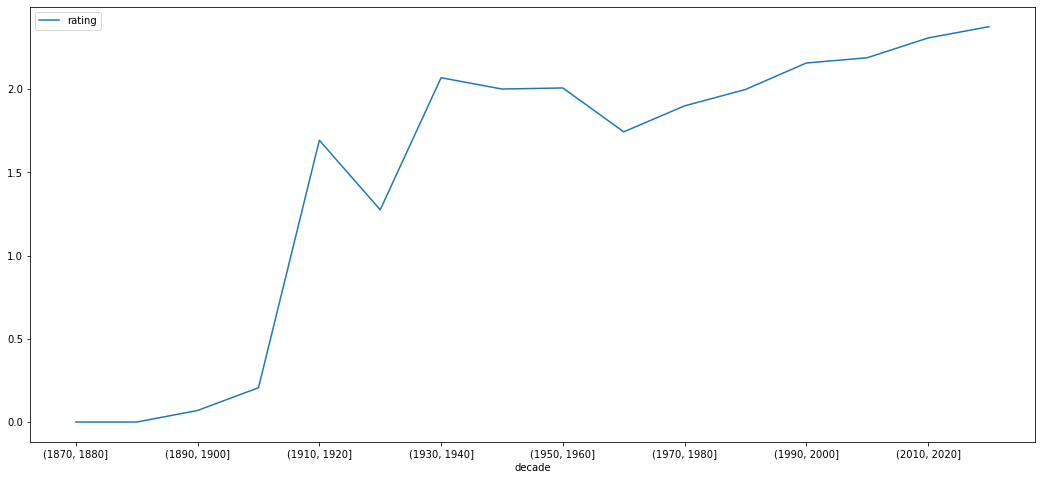

In [53]:
decades2 = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
all_bechdel['decade'] = pd.cut(all_bechdel['year'], decades2)
bechdel_trend = all_bechdel[['decade', 'rating']].groupby('decade').mean()
bechdel_trend
bechdel_trend.plot(figsize=(18,8))

we can clearly see that the average bechdel rating has increased over past few decades.

In [54]:
bechdel_imdb = all_bechdel.merge(dataDF, left_on='imdbid', right_on='IMDb_id', suffixes=('_bechdel', '_imdb'), how = 'left')
bechdel_imdb['in_250?'] = bechdel_imdb['name'].notna()

bechdel_imdb_total = bechdel_imdb[['in_250?', 'title']].groupby(['in_250?']).count()
bechdel_imdb_total.columns = ['total']

bechdel_imdb_grouped = bechdel_imdb[['in_250?', 'rating_bechdel', 'title']].groupby(['in_250?','rating_bechdel']).count()
bechdel_imdb_grouped.columns = ['count']
bechdel_imdb_grouped = bechdel_imdb_grouped.reset_index()

DF10 = bechdel_imdb_grouped.merge(bechdel_imdb_total, on = 'in_250?')
DF10['percentage'] = DF10['count']/DF10['total']*100
DF10_result = DF10.pivot(index='rating_bechdel', columns='in_250?', values='percentage')
DF10_result

in_250?,False,True
rating_bechdel,,
0,10.905218,20.416667
1,21.522897,31.250000
2,10.095847,10.000000
3,57.476038,38.333333


If we compare the numbers, we can see the that for the movies that are in the imbdb top250, only 38% passed the bechdel test (bechdel rating = 3), compared to the 57% of all other movies.

This means, for the movies that are in the imbdb top250, 62% failed (rating below 3) the test compared to the 43% of all other movies.